## Author : Talha Amir

**Task Description**

* Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can
work to make more profit.
* What all business problems you can derive by exploring the data?
* You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
link = "https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view"
data =  pd.read_csv(f"https://drive.google.com/uc?id={link.split('/')[-2]}")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [99]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [101]:
data.drop_duplicates(inplace=True)

In [102]:
data.describe().drop("Postal Code",axis=1)

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [103]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [104]:
data['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

Data reduction involves dropping the attribute ‘Country’ through attribute dimensionality reduction, since it is redundant with 100% exact same values of "United States" for all records. 'Postal Code' is also dropped since this attribute is less important towards the profit-centric task."

In [105]:
data.drop("Country",axis=1,inplace=True)
data.drop("Postal Code",axis=1,inplace=True)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


Exporing all the categorical values wrt to columns

In [107]:
categorical_columns =  [col for col in data.columns if data[col].dtype == "object"]
for i in categorical_columns:
    print(i,"\n",(data[i].unique()))

Ship Mode 
 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment 
 ['Consumer' 'Corporate' 'Home Office']
City 
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' '

As there is no noise in the Categorical Data, we will move to the next steps

## Exploratory Data Analysis

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the Superstore to identify concern areas and problems, and the resolution of these can boost their profits.

First, the summary statistics will be considered.


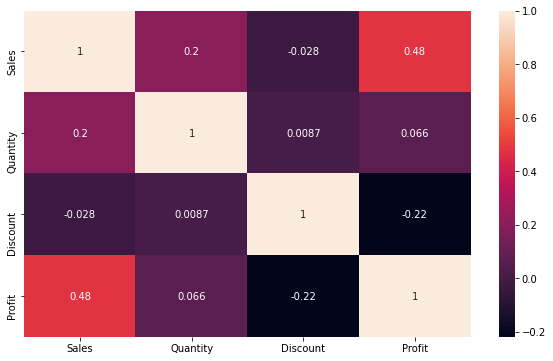

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)



*   The Relation between Sales and Profit is quit good,which indicates that when Sales incease by 1USD profit is increased by 0.48USD
*   Sales and quantity have a very weak co-relation which means that the Super Store is selling a noticeable amount of products of on a low profit scale.
* Profit and Discount have a negative relation which clearly indicated that Selling products with higher discounts more than 20% will result in losses
* Discount and  quantity have a very weak co-relation which indicates that Superstores discounts based on large of number of quantities of products are not pleasing enough for the customers to generate sales.




In [109]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


Exploring more from the cateogrical data.

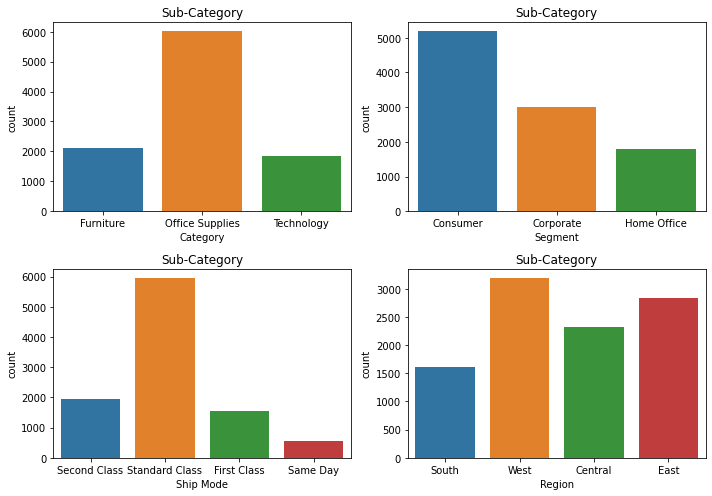

In [110]:
columns = ["Category","Segment","Ship Mode","Region"]
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));
axs = axs.flatten()

for column,sub_plot in zip(columns,axs):
    sns.countplot(x= data[column],ax=sub_plot)
    sub_plot.set_title(i)

plt.tight_layout()

* For  **Category** Plot We can clearly observe that OFfice Supplies are more than sum of Furniture and Technology. 
* For  **Segment** Plot it clear that Consumer segment is leading by 5k, while Corporate Segment is 3k and Home office lies around 2k
* For the **Ship Mode** we have standard class leading the count by 6k while the other combined are aorund 5k
* For the **Region** we have a good distribution where West is the most common Region over 3K and with East over 2.5K

Exploring more about Sales to Profit 

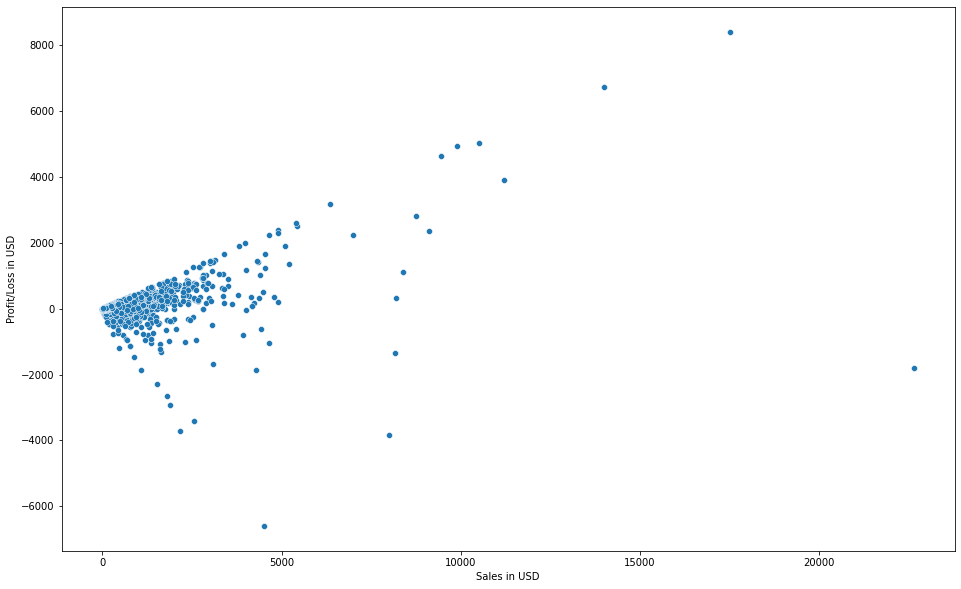

In [111]:
plt.figure(figsize=(16,10))
plt.xlabel("Sales in USD")
plt.ylabel("Profit/Loss in USD")
sns.scatterplot(x=data['Sales'],y=data['Profit'])

* Most of the sales made is under 5K
* Sales over 2.5K are most likely Profitable
* An obserable number of Sales under 2.5 K are in loss which is mostly due to heavy discounts of products

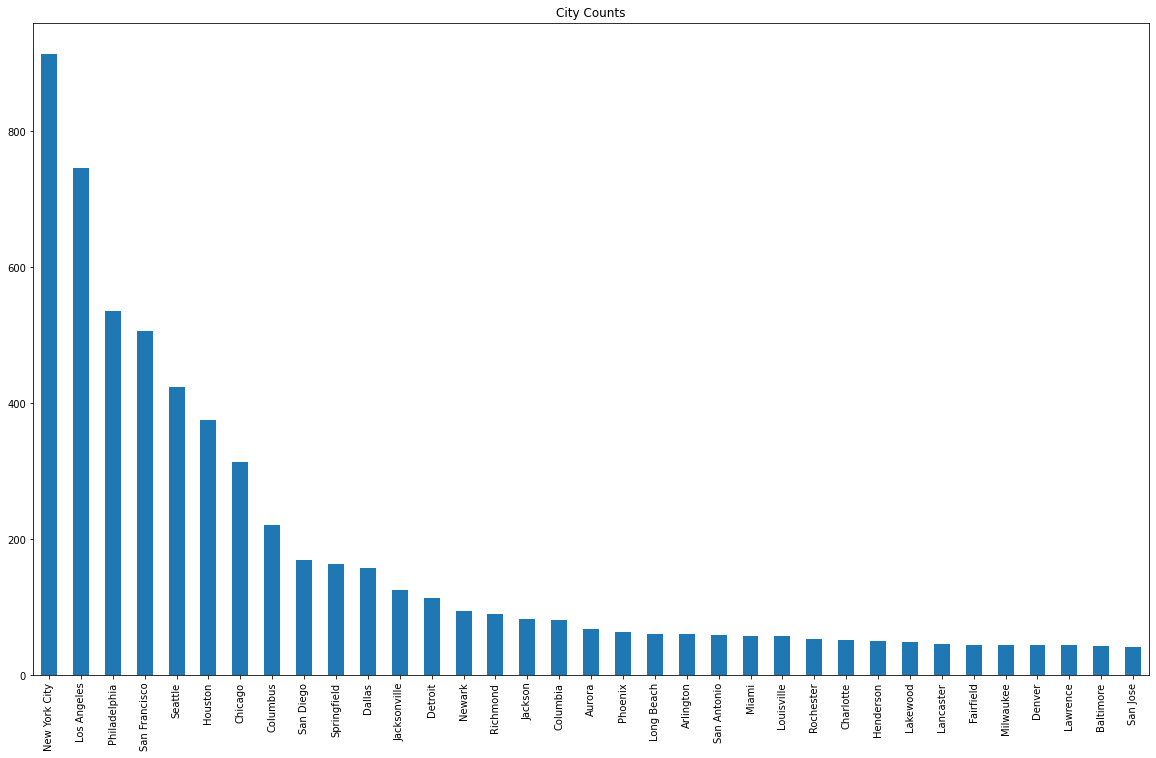

In [112]:
data['City'].value_counts().head(35).plot(kind="bar",figsize=(20,12),title="City Counts")

Top 4 cities with most data are 


> * New York city
> * Los Angles
> * Philadelphia
> * San Fransisco



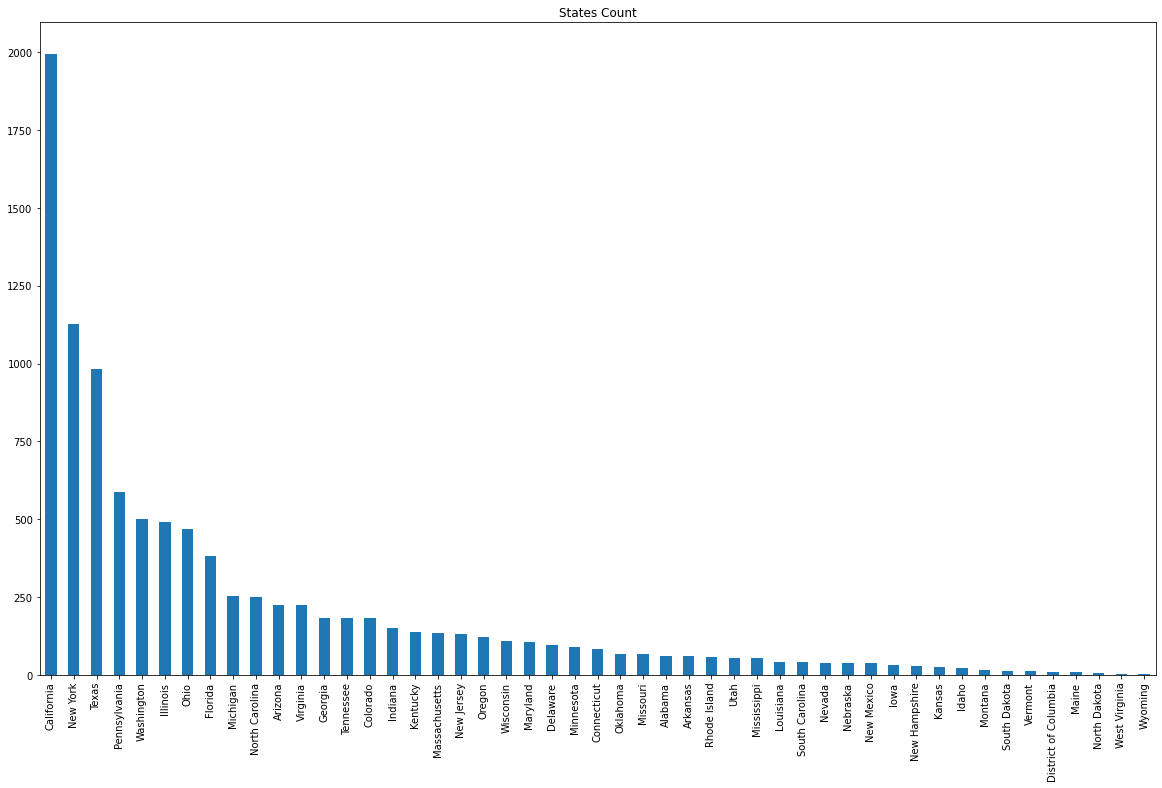

In [113]:
plt.title = "States"
data['State'].value_counts().plot(kind="bar",figsize=(20,12),title="States Count")

Following are the top number of Dealings per state
* California       1996
* New York         1127
* Texas            983
* Pennsylvania     586
* Washington       502

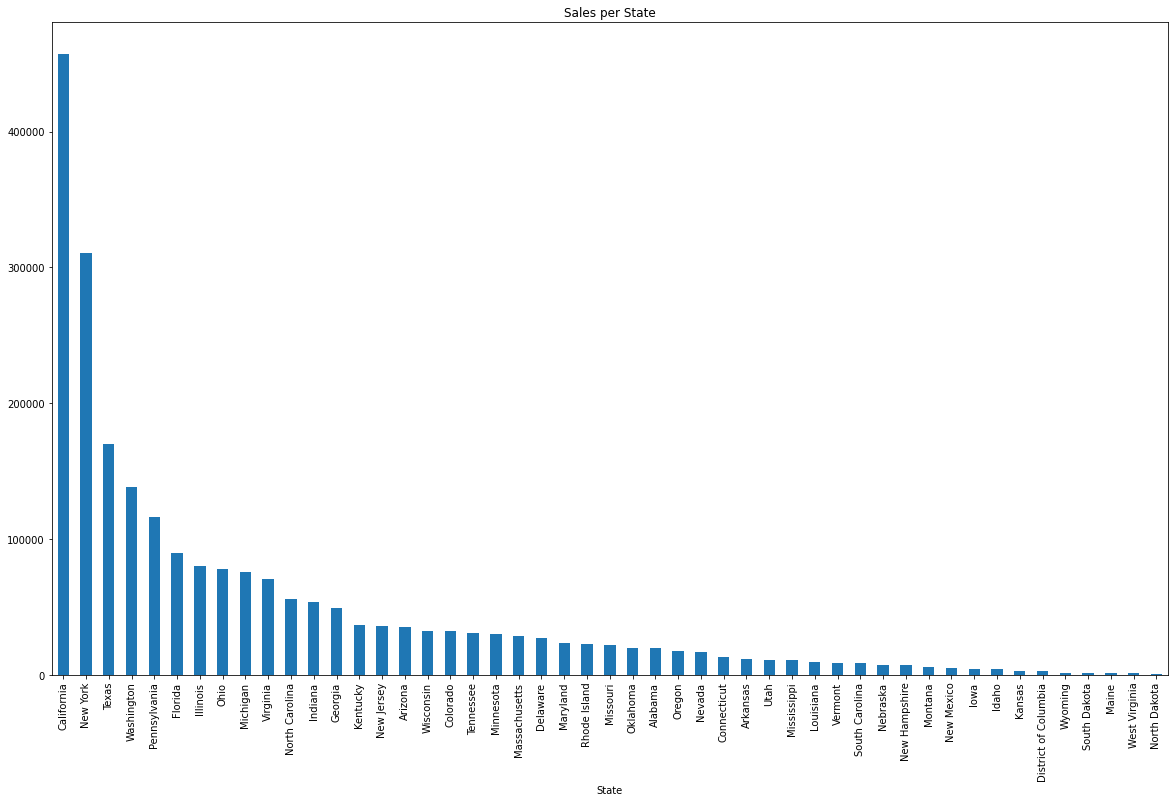

In [114]:
# total Sales for each State
data.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (20,12),title="Sales per State",)
plt.show()

As we can observe that Super Store has Clearly a match between number of dealings with number of sales

* California, with over USD$450K of total sales.

* New York has the second highest sales, with over USD$300k of total sales.

* Texas is third with around USD$170K of total sales.

Most of the Profit is from the Consumer Segment and the least Profit is made from Home Office

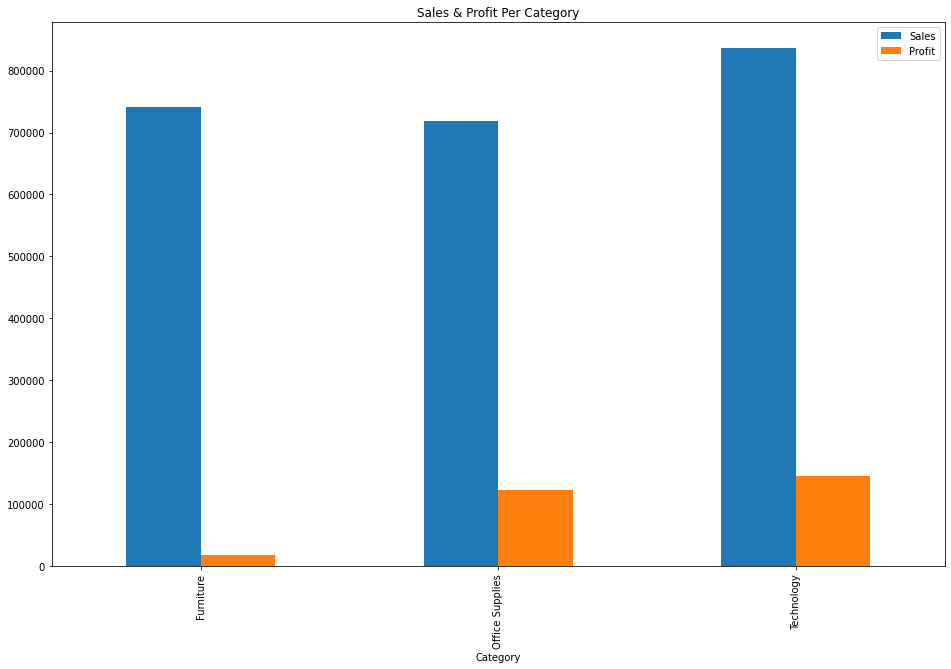

In [115]:
data.groupby("Category")[['Sales','Profit']].sum().plot(kind="bar",figsize=(16,10),title = "Sales & Profit Per Category",legend=True)
plt.show()

* Technology and Office Supllies do result in a decent amount of profit while Furnitures Sales to Profit Ratio is way too less where Total Sales is 741306	and total profit is 18421.8137

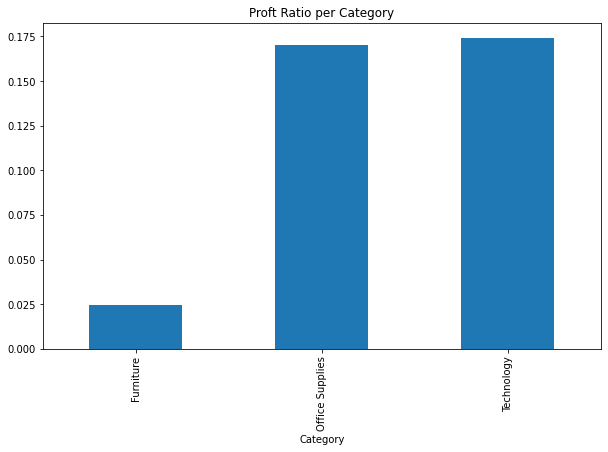

In [116]:
temp =  data.groupby("Category")[['Sales','Profit']].sum()
temp =  temp['Profit']/temp['Sales']
temp.plot(kind="bar",figsize=(10,6),title="Proft Ratio per Category")

It is more clear that Furniture Category has the least amount of Profit Margins

Text(0.5, 1.0, 'Sales & Profit Per Discount')

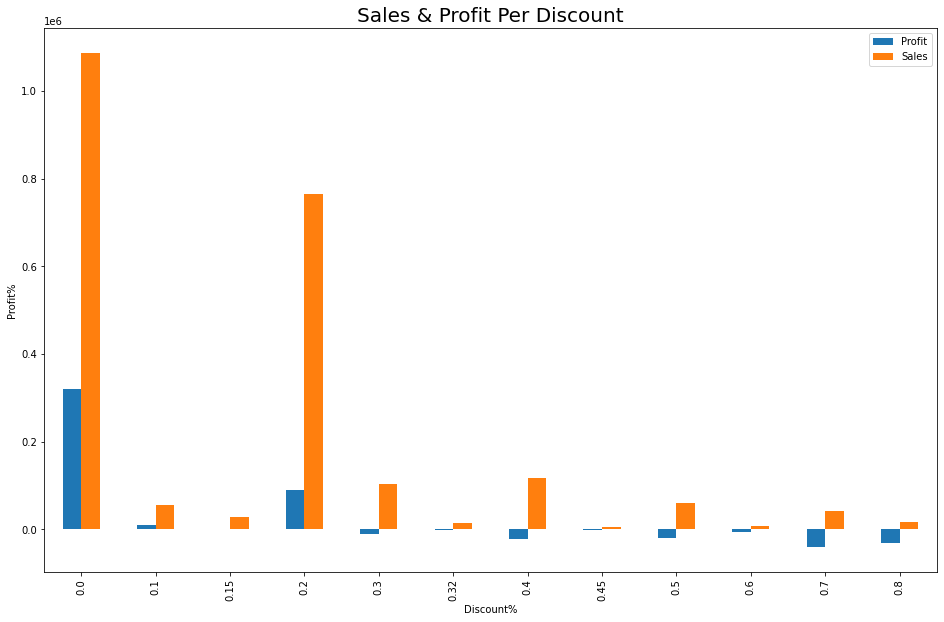

In [117]:
data.groupby("Discount")[['Profit','Sales']].sum().plot(kind="bar",figsize=(16,10),xlabel="Discount%",ylabel="Profit%").set_title("Sales & Profit Per Discount",fontsize=20)

* Discounts above 20% are resulting in a loss
* Increase in discount is not resulting with increase in sales
* The highest sale is made by the products having 0% discount

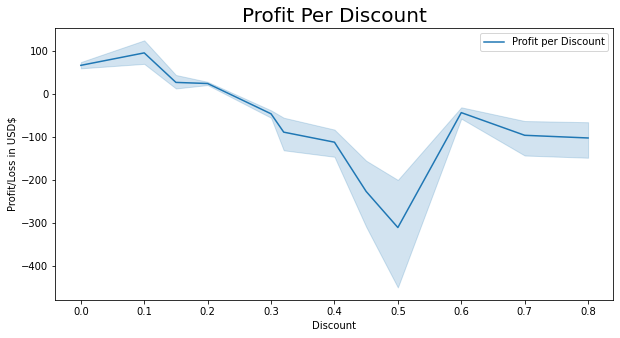

In [118]:
plt.figure(figsize = (10, 5))
sns.lineplot(x=data['Discount'],y=data['Profit'], label = 'Profit per Discount').set_title("Profit Per Discount",fontsize=20)
plt.ylabel('Profit/Loss in USD$')
plt.show()

Higher discounts likely also encouraged bad consumer psychology, instead of targeting to implement discounts as a promotional strategy to successfully increase sales. A considerable number of customers may develop the thinking that Superstore's products are defective or low quality. In a long run, this can negatively affect Superstore's brand image. All in all, Superstore is advised to consider other promotional strategies.

The worst losses occured when discount approximates 50%. This may indicate festivals, end-of-season sales, and clearance sales for older designs.

Superstore is most profitable when discount levels lower than 10% are offered. This allows less occurences of lowered prices after discount deductions, and thus larger profit margins and profits.

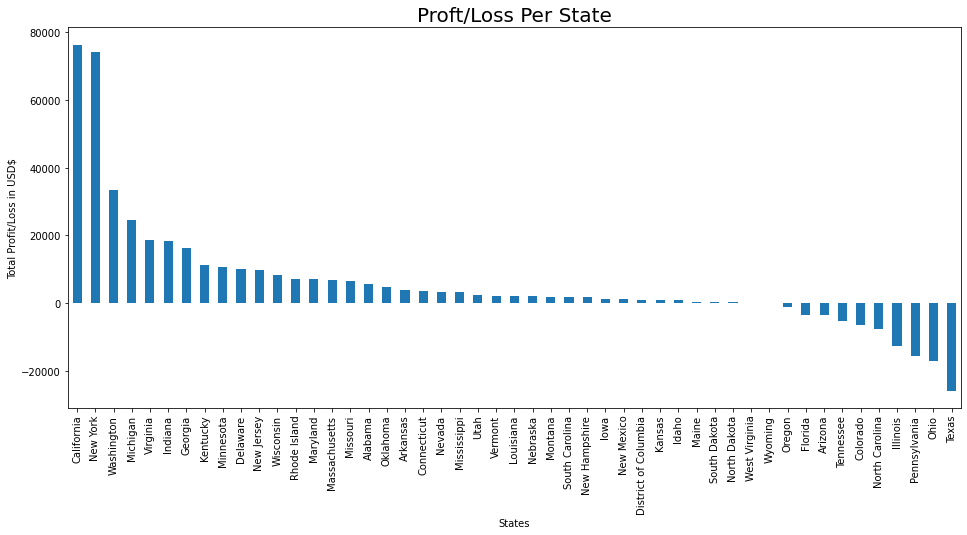

In [119]:
data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (16, 7)  ).set_title("Proft/Loss Per State",fontsize=20)
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('States')
plt.show()

The most Profitable States are :

* California    76330.7891
* New York      74015.4622
* Washington    33368.2375
* Michigan      24428.0903

The State with the most losses are:
* Illinois       -12601.6500
* Pennsylvania   -15565.4035
* Ohio           -16959.3178
* Texas          -25750.9833

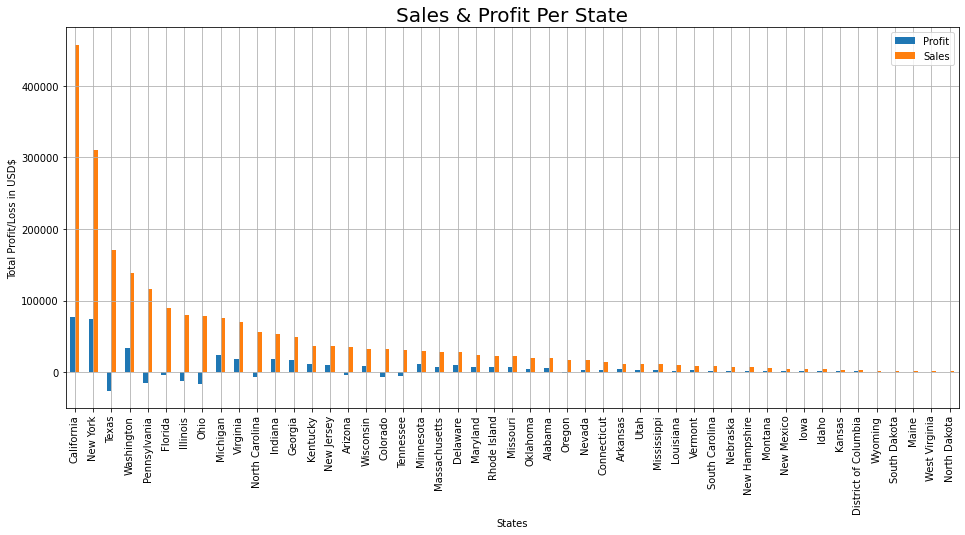

In [120]:
ax = data.groupby('State')[['Profit','Sales']].sum().sort_values(ascending = False,by='Sales').plot.bar(figsize = (16, 7)  ,grid=True)
ax.set_title("Sales & Profit Per State",fontsize=20)
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('States')
plt.show()

* It can be clearly observed that **Texas** and **Pennsylvania** are having sales more than 100K but are resulting in losses
* States with the least sales are not resulting in a loss
* States having Sales around 100K - 20K are likely to be in loss
 

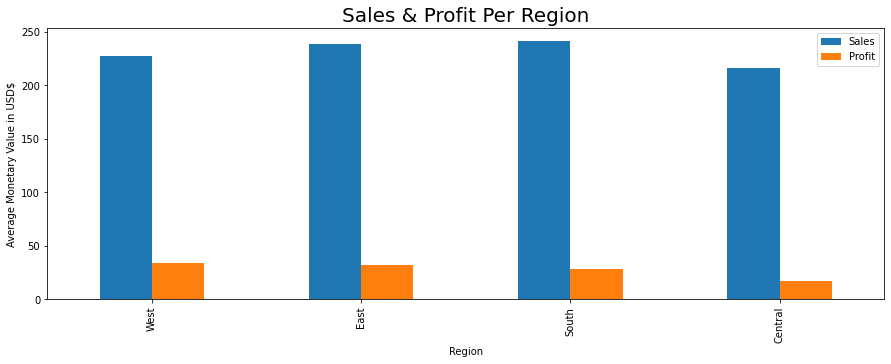

In [121]:
df_region = data.groupby(['Region'])[['Sales', 'Profit']].mean()
df_region.sort_values('Profit', ascending = False).plot(kind = 'bar',figsize = (15, 5)).set_title("Sales & Profit Per Region",fontsize=20)
plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Region')
plt.show()

The profit and sales per region are equally distributed there is no observeable difference b/w different regions

Text(0.5, 1.0, 'Profit & Sales Per Segment')

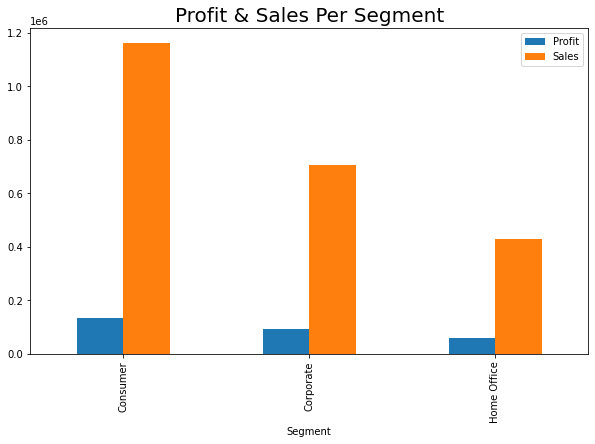

In [122]:
data.groupby("Segment")[['Profit',"Sales"]].sum().plot(kind="bar",figsize=(10,6)).set_title("Profit & Sales Per Segment",fontsize=20)

Moving on to analyse the effect of customer segments on sales and profit :

* **Consumer Segment** is generating more a large amount of sales as compared to Corporate and Home Office. Although due to very low profit margins the Profit is very less as compared to Corporate and Home Office.The Super Store must improve their marketing and planning ideas and should increase the profit margins of Cosumer Segment.

* **Corporate Segment** does have a good profit ratio, trying to increase the sales for Corporat Segment would definitely help the Super Store

* **Home Office** is likely to be the most profitable Segment, Store should focus on working on different strategies to increase their sales

The remaining section will be completely focussing on the Category and Sub-Cateogry w.r.t Sales,Profit,Unit Price,Unit Proft

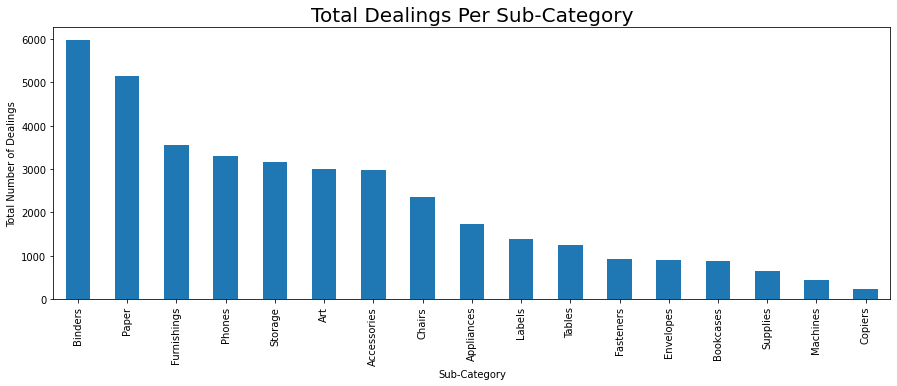

In [123]:

data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5)).set_title("Total Dealings Per Sub-Category",fontsize=20)
plt.ylabel('Total Number of Dealings')
plt.xlabel('Sub-Category')
plt.show()

* The most dealt Sub-Category is **Binders** with  5971 dealings.
* After a small gap we have **Paper** with 5144 dealings
The rest are:
* Furnishings    3560
* Phones         3289
* Storage        3158
* Art            2996

Text(0.5, 1.0, 'Sales & Profit w.r.t Sub-Category')

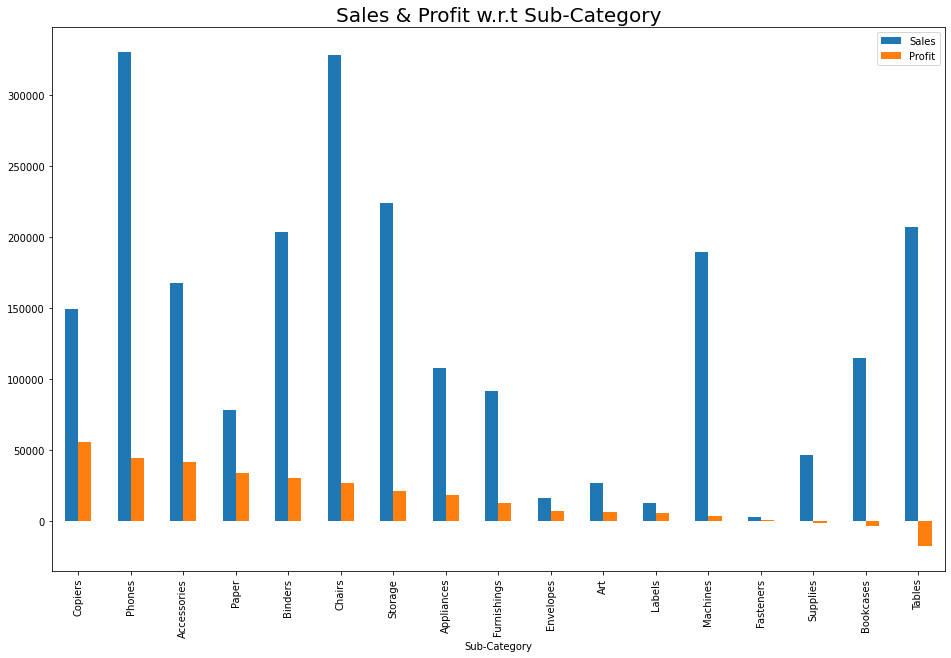

In [124]:
plt.title = "Sales & Profit Per Sun Cateogry"
data.groupby(['Sub-Category'])[['Sales','Profit']].sum().sort_values(by=['Profit'],ascending=False).plot(kind="bar",figsize=(16,10)).set_title("Sales & Profit w.r.t Sub-Category",fontsize=20)

The top 3 Profit Making Sub-Categories are:
* Copiers		55617.8249
* Phones		44515.7306
* Accessories		41936.6357

The top 3 in loss are:
* Tables	-17725.4811
* Bookcases		-3472.5560
* Supplies		-1189.0995


Let us deep dive into the Unit Price and Unit Profits per Sub-Category


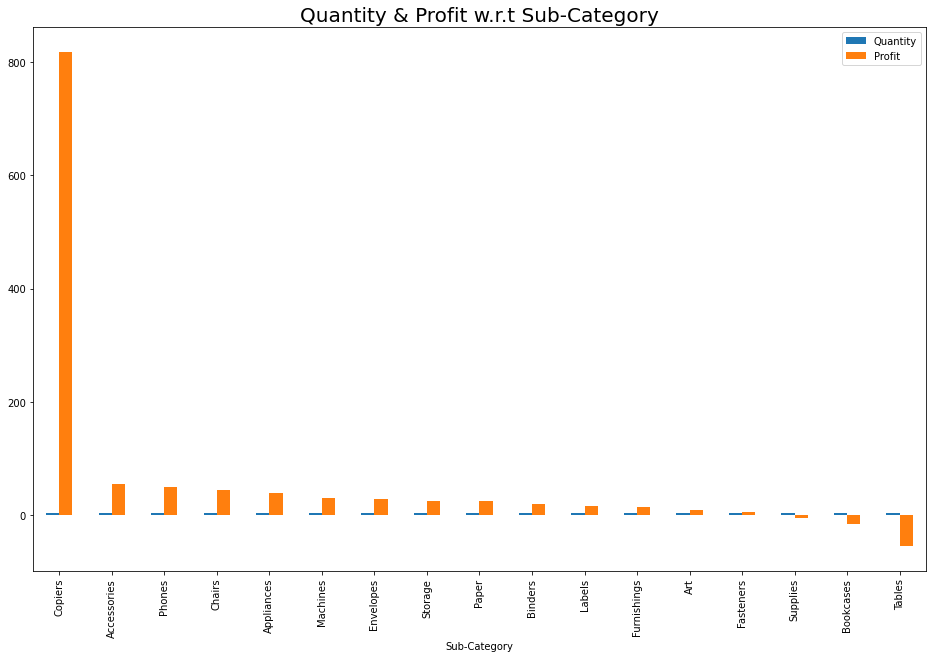

In [125]:
sub_q_p =  data.groupby(['Sub-Category'])[["Quantity",'Profit']].mean().sort_values(by=['Profit'],ascending=False).plot(kind="bar",figsize=(16,10)).set_title("Quantity & Profit w.r.t Sub-Category",fontsize=20)

In [126]:
data['Unit Price'] = data.Sales / data.Quantity

# Unit Profit calculation
data['Unit Profit'] = data.Profit / data.Quantity 

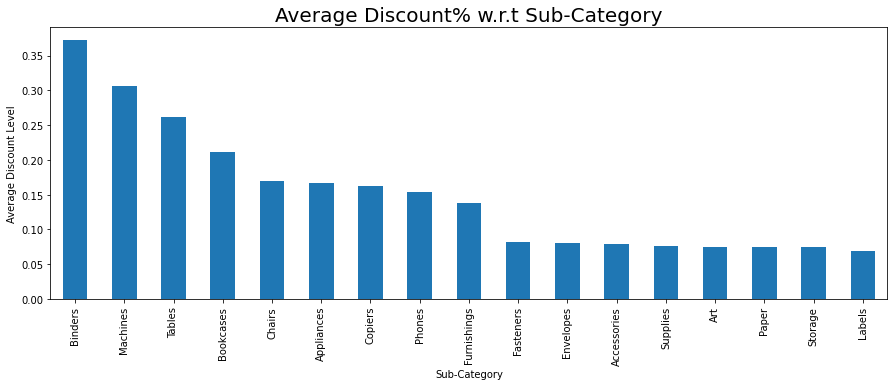

In [127]:
data.groupby("Sub-Category")['Discount'].mean().sort_values(ascending=False).plot(kind = 'bar',figsize = (15, 5)).set_title("Average Discount% w.r.t Sub-Category",fontsize=20)
plt.ylabel('Average Discount Level')
plt.xlabel('Sub-Category')
plt.show()

1. Furnitures:
*  Tables have the highest sales, yet suffer the most losses. This may be due to its third highest average discount of over 25%. 
* Bookcases also suffer losses despite their high sales.
* Chairs have the highest average discounts, which lower their profitability in terms of both profits and revenues, despite generating the highest overall profits from sales.
* Furnitures have the highest average discounts, which lower their profitability both in terms of profits and revenues.
2. Office Supplies:
* With an average discount of around 37.5%, binders have the lowest profitability both from a profit perspective and in terms of profit margins. Overall, all categories have up to date profit margins. 
* This is probably due to the fact that most categories have strong wholesale margins.

3. Technology:
* With remarkably high sales but almost negligible profits, Machine has the lowest profit margin. This may be due to the second highest average discounts at 30%.
* Even with lower sales, the Phones and Accessories have high profits, compared to such profits earned from Chairs, Appliances, and Machines. Profit margins are also good.


Text(0.5, 0, 'Ship Mode')

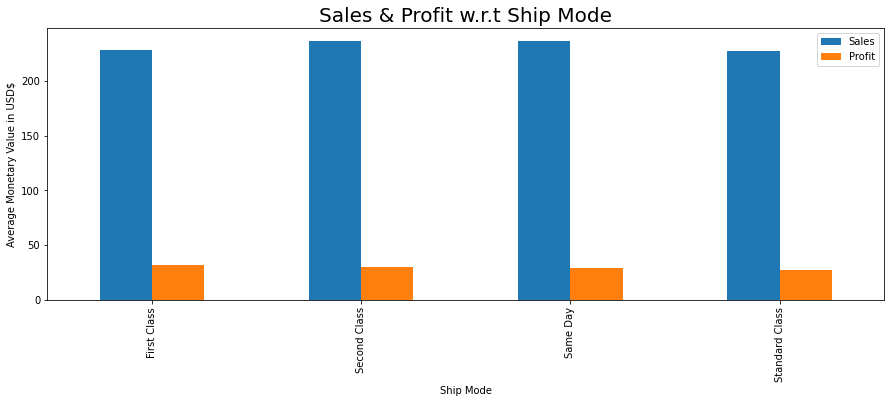

In [128]:
# average Sales and Profit of Ship Mode
data.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit', 'Unit Price', 'Unit Profit']].mean().sort_values('Profit', ascending = False)[["Sales", "Profit"]].plot(kind = 'bar',
                                                                           figsize = (15, 5)).set_title("Sales & Profit w.r.t Ship Mode",fontsize=20)
plt.ylabel('Average Monetary Value in USD$')
plt.xlabel('Ship Mode')


Ship Mode has Almost no inference in sales and profit, having all ship modes equally distributed.

Now Movings towards the Final Outcomes 

## As a business manager, try to find out the weak areas where you can work to make more profit
* Discount should not be more than 10% for marginal profit Max(20%)
* Price of chairs, phones, supplies, tables and bookcases should be increased inorder to recieve reasonable profit.
* Focus on the Consumer Segment Products for better profits, becuase the Consumer Segment Dominates the Sakes.
* Focus on increasing sales in states with low amount of sales.
* Price of Furniture Category should be Optimized


## What all business problems you can derive by exploring the data?
* Heavy Discounts were resulting in Heavy losses
* Discount of more than 20% will always result in a loss.
* Supplies, Tables and Bookcases have high sales but still result in a loss.
* Wyoming, West Virginia, North Dakota, etc have lowest number of sales.
* Illinois,Pennsylvania ,Ohio ,Texas are the states resulitng in losses due to low profit margins